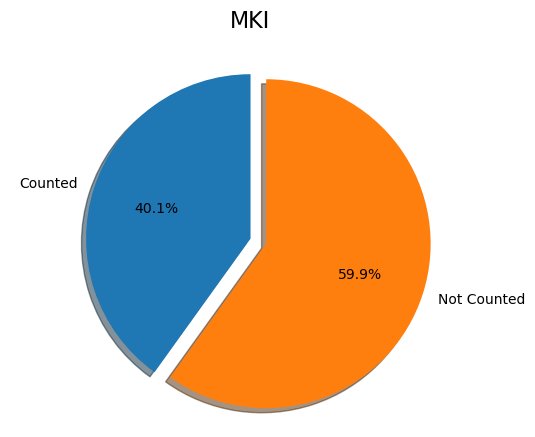

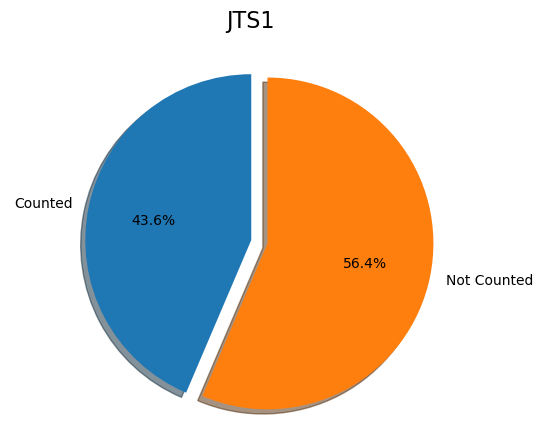

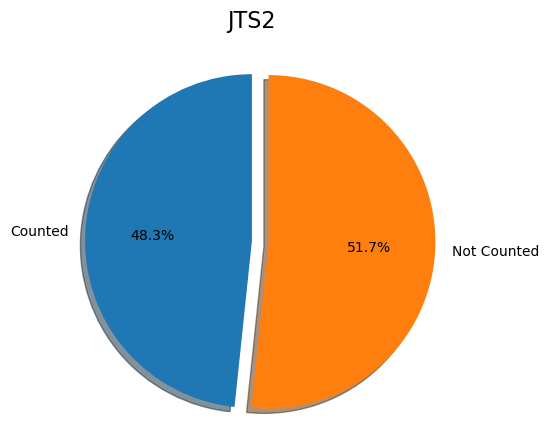

In [5]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# plt.suptitle("This Main Title is Nicely Formatted", fontsize=16)
labels = 'Counted', 'Not Counted'
sizes = [40.08, 100-40.08,]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
fig1.suptitle("MKI", fontsize=16)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Counted', 'Not Counted'
sizes = [43.58, 100-43.58]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig2, ax2 = plt.subplots()
fig2.suptitle("JTS1", fontsize=16)
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Counted', 'Not Counted'
sizes = [48.34, 100 - 48.34]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig3, ax3 = plt.subplots()
fig3.suptitle("JTS2", fontsize=16)
ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()